#### Visualização de Dados

In [8]:
# Import dos pacotes que serão utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Obtenção dos dados

Os dados foram obtidos do curso de Ciência de dados do prof Fernando Amaral.

Nessa primeira parte é feita a vizualização dos dados `trees`. Depois de importar os dados e salvá-los em forma de dataframe do pandas, o atributo `shape` mostra o número de linhas e colunas do dataframe e o método `head` mostra as cinco primeiras entradas.


In [4]:
dataset = pd.read_csv("data/trees.csv")
dataset.shape

(31, 3)

In [5]:
dataset.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


Com essas informações, o dataset é composto por 31 entradas e 3 atributos que são as linhas e colunas. As colunas, que são os atributos das árvores armazenadas são `Girth` que é a circunferência do tronco da árvore, `Height` que é a altura e `Volume` que é o volume.

Text(0.5, 0, 'Altura')

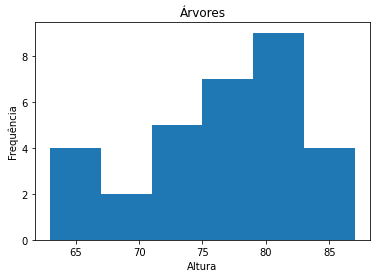

In [7]:
plt.hist(dataset.iloc[:, 1], bins=6)
plt.title("Árvores")
plt.ylabel("Frequência")
plt.xlabel("Altura")

Através da biblioteca `matplotlib` é possível gerar um histograma utilizando a base de dados pelo método `hist`. Com esse histograma observa-se como os dados estão distribuídos. O argumento `bins` determina a quantidade de grupos de dados que serão representados. Se forem utilizados muitos grupos é provável que o histograma perca sua força, o histograma é um gráfico que evidencia a distribuição dos dados, muitos grupos dificulta a realização dessa tarefa.

Uma outra forma de gerar um histograma é através da biblioteca `seaborn`, nela o método `histplot`, que funciona de forma muito semelhante ao método `hist` da `matplotlib`. O atributo `kde` com o valor padrão `False` exibe uma linha de densidade que mostra a função de distribuição aproximada dos dados.

<AxesSubplot:xlabel='Height', ylabel='Count'>

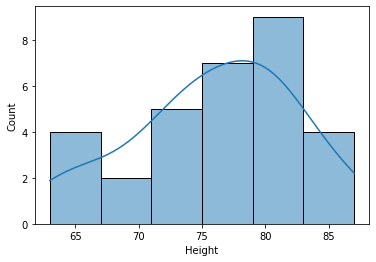

In [12]:
sns.histplot(dataset.iloc[:, 1], bins=6, kde=True)